# Bayes 3

#### Neural network 2 in keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

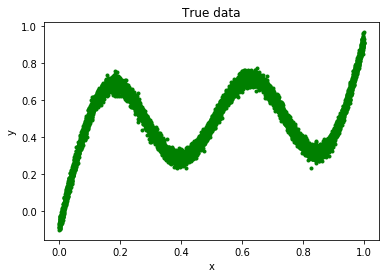

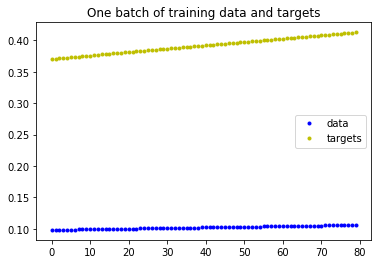

In [69]:
n = 10000
X = np.linspace(0, 1, n)
def gen_Y(X, noise=False):
    noise_data = np.random.normal(0, 0.02)
    data = list()
    for x_ in X:
        y = x_ + 0.3*np.sin(2*np.pi*(x_ + noise_data)) + 0.3*np.sin(4*np.pi*(x_ + noise_data)) + noise_data
        if not noise:
            data.append(y)
        else:
            data.append(np.random.normal(y, noise))
    return np.array(data)

# Training data and targets
def get_training_data(X, n, batch_size, batches):
    n1 = np.random.normal(0, 0.02)
    n2 = np.random.normal(0, 0.025)
    chance = np.random.randint(n - batch_size)
    X_train = X[chance: chance + batch_size].reshape(1, batch_size)
    Targets = np.reshape(
        [x_ + 0.3*np.sin(2*np.pi*(x_ + n1)) + 0.3*np.sin(4*np.pi*(x_ + n1)) + n1 for x_ in X_train], (1, batch_size))
    for _ in range(batches - 1):
        chance = np.random.randint(n - batch_size)
        x_batch = X[chance: chance + batch_size].reshape(1, batch_size)
        targets = np.reshape(
        [x_ + 0.3*np.sin(2*np.pi*(x_ + n1)) + 0.3*np.sin(4*np.pi*(x_ + n1)) + n1 for x_ in x_batch], (1, batch_size))
        X_train = np.concatenate((X_train, x_batch))
        Targets = np.concatenate((Targets, targets))
    return np.expand_dims(X_train, axis=0), np.expand_dims(Targets, axis=0)

plt.title('True data')
plt.plot(X, gen_Y(X, noise=0.02), 'g.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
xx, tt = training_data(X, n, batch_size=80, batches=1)
plt.title('One batch of training data and targets')
plt.plot(xx[0][0], 'b.', label='data')
plt.plot(tt[0][0], 'y.', label='targets')
plt.legend()
plt.show()


 *****************************************************************
batch_size=2 * batches=20 * layer_size=20 * l_r=0.01
epoch:0 * loss:0.06400000303983688


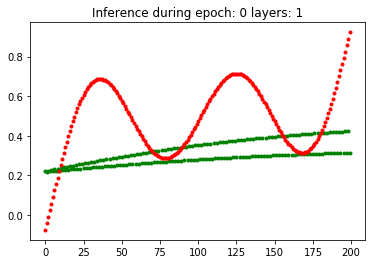

epoch:4500 * loss:0.028999999165534973


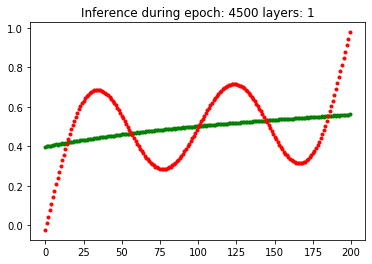

epoch:9000 * loss:0.032999999821186066


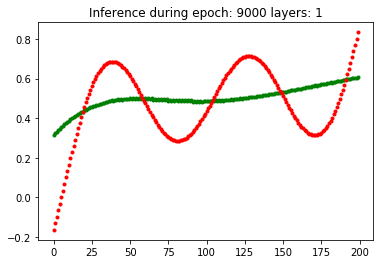

epoch:13500 * loss:0.01600000075995922


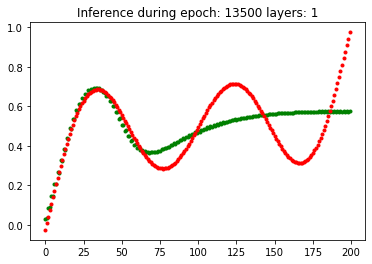

epoch:18000 * loss:0.013000000268220901


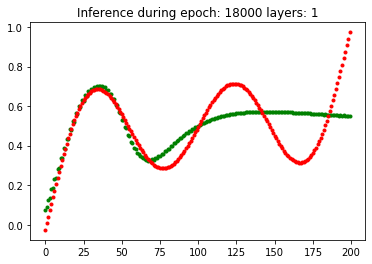

epoch:22500 * loss:0.028999999165534973


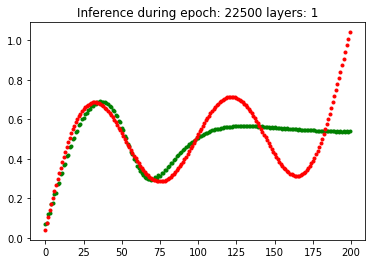

epoch:27000 * loss:0.007000000216066837


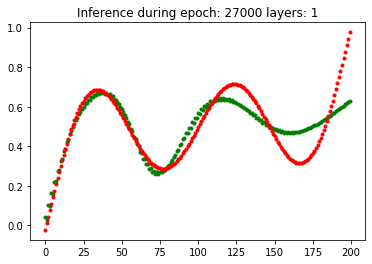

epoch:31500 * loss:0.0


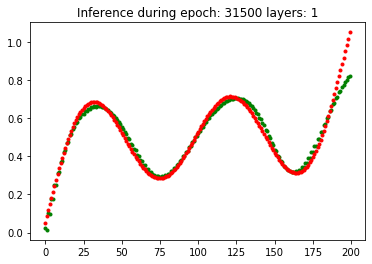

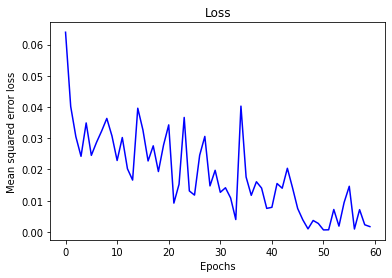

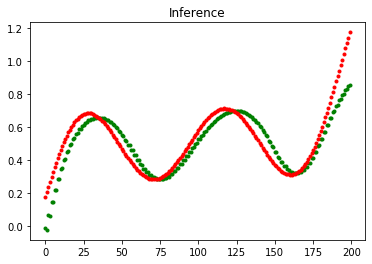


 *****************************************************************
batch_size=2 * batches=20 * layer_size=20 * l_r=0.01
epoch:0 * loss:0.027000000700354576


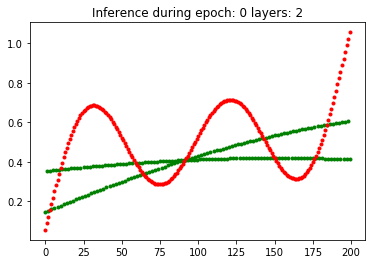

epoch:4500 * loss:0.027000000700354576


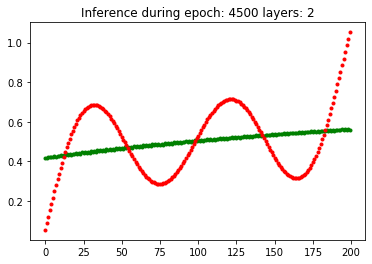

epoch:9000 * loss:0.03200000151991844


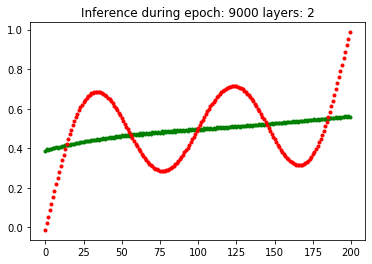

epoch:13500 * loss:0.01600000075995922


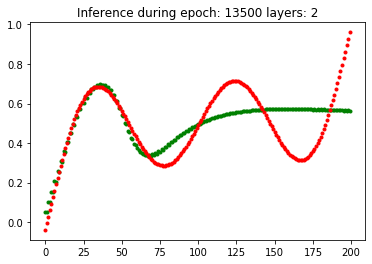

epoch:18000 * loss:0.02500000037252903


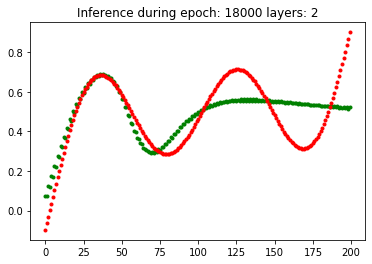

epoch:22500 * loss:0.003000000026077032


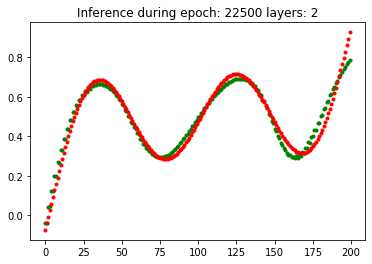

epoch:27000 * loss:0.0020000000949949026


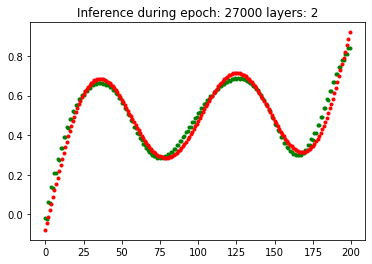

epoch:31500 * loss:0.0010000000474974513


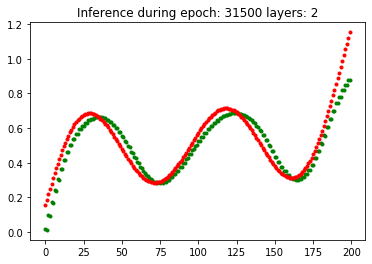

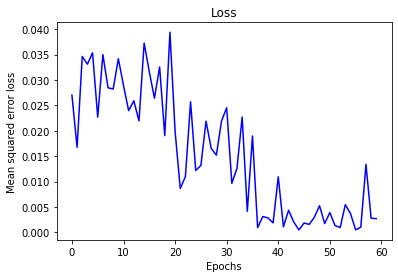

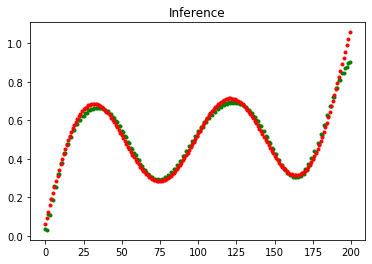

In [82]:
# Run loop
Epochs = (36000,)
Batches = (20,)
Batch_size = (2,)
Layer_size = (20,)
L_r = (0.01,)
Layers = (1, 2)
for epochs in Epochs:
    for batches in Batches:
        for batch_size in Batch_size:
            for layer_size in Layer_size:
                for l_r in L_r:
                    for layer in Layers:
                        # Train loop
                        model = Sequential()
                        model.add(Dense(layer_size, input_shape=(batches, batch_size,), activation='tanh'))
                        for _ in range(layer):
                            model.add(Dense(layer_size, activation='tanh'))
                        #model.add(Dense(layer_size, activation='tanh'))
                        #model.add(Dense(layer_size, activation='tanh'))
                        #model.add(Dense(layer_size, activation='tanh'))
                        model.add(Dense(batch_size, activation='tanh'))
                        opt = SGD(learning_rate=l_r)
                        model.compile(optimizer=opt, loss='mse')

                        print('\n', '*'*65)
                        print(f'batch_size={batch_size} * batches={batches} * layer_size={layer_size} * l_r={l_r}')
                        Loss = list()
                        for epoch in range(epochs):
                            for batch in range(batches):
                                X_train, Targets = get_training_data(X, n, batch_size, batches)
                                loss = model.train_on_batch(X_train, Targets)
                            if epoch % int(epochs / 60) == 0:
                                Loss.append(loss)

                            if epoch % int(epochs / 8) == 0:
                                print(f'epoch:{epoch} * loss:{round(loss, 3)}')
                                # Inference in  train loop
                                inference_size = 200
                                inference_space = np.linspace(0, 1, inference_size)
                                zeros = np.zeros((batches - 1, batch_size))
                                x_infer = np.expand_dims(np.concatenate((zeros, inference_space[:batch_size].reshape(1, batch_size))), axis=0)
                                Y_infer = model.predict(x_infer)[0][-1]
                                X_infer = x_infer[0][-1]
                                for i in range(batch_size, inference_size, batch_size):
                                    if i > inference_size - batch_size:
                                        break
                                    x_infer = np.expand_dims(np.concatenate((zeros, inference_space[i: i + batch_size].reshape(1, batch_size))), axis=0)
                                    y_infer = model.predict(x_infer)[0][-1]
                                    X_infer = np.concatenate((X_infer, x_infer[0][-1]))
                                    Y_infer = np.concatenate((Y_infer, y_infer))
                                Y_true = gen_Y(X_infer)
                                plt.title('Inference during epoch: ' + str(epoch) + ' layers: ' + str(layer))
                                plt.plot(Y_infer, 'g.')
                                plt.plot(Y_true, 'r.')
                                plt.show()

                        # Loss when done
                        plt.title('Loss')
                        plt.plot(Loss, 'b')
                        plt.xlabel('Epochs')
                        plt.ylabel('Mean squared error loss')
                        plt.show()

                        # Inference when done
                        inference_size = 200
                        inference_space = np.linspace(0, 1, inference_size)
                        zeros = np.zeros((batches - 1, batch_size))
                        x_infer = np.expand_dims(np.concatenate((zeros, inference_space[:batch_size].reshape(1, batch_size))), axis=0)
                        Y_infer = model.predict(x_infer)[0][-1]
                        X_infer = x_infer[0][-1]
                        for i in range(batch_size, inference_size, batch_size):
                            if i > inference_size - batch_size:
                                break
                            x_infer = np.expand_dims(np.concatenate((zeros, inference_space[i: i + batch_size].reshape(1, batch_size))), axis=0)
                            y_infer = model.predict(x_infer)[0][-1]
                            X_infer = np.concatenate((X_infer, x_infer[0][-1]))
                            Y_infer = np.concatenate((Y_infer, y_infer))
                        Y_true = gen_Y(X_infer)
                        plt.title('Inference')
                        plt.plot(Y_infer, 'g.')
                        plt.plot(Y_true, 'r.')
                        plt.show()